In [181]:
# Import needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [182]:
#Defines Global Variables data entries
TOTAL_DATA = 150

# Splits data into training(80%) and testing(20%)
TRAINING_DATA = int(TOTAL_DATA*0.8) 
TESTING_DATA = int(TOTAL_DATA*0.2)

# Number of input features
FEATURE_NUMBER = 4

# Number of classes and respective indexing
CLASS_NUMBER = 3
CLASSNAMES = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

In [183]:
# Read in data
data = pd.read_csv('../../DataSets/Iris.csv')

#Splits into 2 classes instead of 3
#data = data[0:100]

# Shuffle data
data = data.sample(frac = 1)

data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
66,67,5.6,3.0,4.5,1.5,Iris-versicolor
90,91,5.5,2.6,4.4,1.2,Iris-versicolor
98,99,5.1,2.5,3.0,1.1,Iris-versicolor
50,51,7.0,3.2,4.7,1.4,Iris-versicolor


In [184]:
# Pulling feature data and splicing it for training/testing using 80-20 ratio
x_train = data.iloc[:TRAINING_DATA, 1:FEATURE_NUMBER+1].values
x_test = data.iloc[TRAINING_DATA:, 1:FEATURE_NUMBER+1].values

# Standardizes the data by dividing the entries by standard deviation (i.e calculating how many standard deviations the entries are from the center)
x_train = (x_train - np.mean(x_train, axis=0)) / np.std(x_train, axis=0)
x_test = (x_test - np.mean(x_test, axis=0)) / np.std(x_test, axis=0)

# Reshape for matrix multiplication
x_train = x_train.reshape(FEATURE_NUMBER, TRAINING_DATA)
x_test = x_test.reshape(FEATURE_NUMBER, TESTING_DATA)



In [185]:
# Pulling label data and splicing it for training/testing using 80-20 ratio
y_train_data = data.iloc[:TRAINING_DATA, -1].values
y_test_data = data.iloc[TRAINING_DATA:, -1].values

# Create vectorized representations of each data point's class membership
y_train = np.zeros(shape=(CLASS_NUMBER, TRAINING_DATA))
y_test = np.zeros(shape=(CLASS_NUMBER, TESTING_DATA))

# Setting numeric labels for each data point's class
for row in range(CLASS_NUMBER):
    y_train[row, :TRAINING_DATA]  = [ele == CLASSNAMES[row] for ele in y_train_data]
    y_test[row, :TESTING_DATA] = [ele == CLASSNAMES[row] for ele in y_test_data]

In [186]:
# Randomly initialize weights and bias matricies
w = np.random.rand(CLASS_NUMBER, FEATURE_NUMBER)
b = np.random.rand(CLASS_NUMBER, 1)



In [187]:
#Class coresspondance function, returns a vector (z), which will be input into softmax function
#The highest number in z represents the correct class
def class_corr(weights, bias, x):
    
    numData = x.shape[1]
    #print(numData)
    z = weights.dot(x)
    #print(z)
    for input in range(numData):
        z[0:CLASS_NUMBER, input:input+1] += bias

    return z

z = class_corr(w, b, x_test)
print(z)



[[-0.52118164 -0.62933637  0.50108745  0.67962948  0.16292104  1.08347338
  -0.46721079 -0.97375421  0.48550047  2.5101303   1.03175269 -0.74148442
   2.24345516  1.62189248  1.09761127  0.28403005  0.12434461  1.87959909
   0.1173755   0.35784973  0.39447321  0.10635793  0.46947287  2.46191196
   0.37151144  0.16760846  0.26323973 -0.63286659 -0.68513067 -0.70160806]
 [ 0.04272923 -0.66118316  0.71085922  0.80002946  0.64404199  1.23209393
   0.14170863  0.07280627 -0.12717492  3.07938    -0.33122092 -1.20575003
   1.85637091  0.78171365  1.68540413  1.07362972  0.49771327  2.27385845
   0.3753887   0.54110137  1.57002318  0.26660997  1.73913277  2.39674202
   1.54865227  1.17016824  1.4825342   1.24445959 -0.74631329 -0.18040212]
 [ 0.23933087 -0.53652527  0.80517916  0.93178858  1.2801974   1.15300554
   0.9684238   0.76482104  0.34387605  3.46651083  0.24478379 -1.16036709
   1.46843186  0.41178044  1.28624308  0.11698188  0.93584113  1.04680845
   0.87978984  1.31114572  1.3405009

In [188]:
#Softmax Function
#expnentiates all elements of the z vector and divides by their sum to see class probability
def softmax(z):

    #creates empty probability array
    y_hat = np.empty([z.shape[0], z.shape[1]])
    numData = z.shape[1]

    #exponentiates the matrix
    z_exp = np.exp(z)

    #Converts z vector into probability distribution
    for input in range(numData):
        z_sum = np.sum(z_exp[0:CLASS_NUMBER, input:input+1])
        y_hat[0:CLASS_NUMBER, input:input+1] = z_exp[0:CLASS_NUMBER, input:input+1]/z_sum
    return y_hat


y_pred = softmax(z)
print(softmax(z))


[[0.20421062 0.3261675  0.27864546 0.29284732 0.17622993 0.30938304
  0.14203023 0.104854   0.41496422 0.18624744 0.58441213 0.43737301
  0.46734935 0.57810245 0.24952544 0.24699449 0.21258981 0.34268647
  0.22533683 0.2085348  0.14672689 0.36023421 0.12291729 0.34913801
  0.16017003 0.191224   0.16760239 0.10109336 0.3507863  0.20110731]
 [0.35890681 0.31594377 0.34368034 0.33031653 0.28512011 0.35895631
  0.26111459 0.29860731 0.22486875 0.3290882  0.1495503  0.27493117
  0.31734605 0.24952829 0.44914858 0.54400894 0.30881216 0.50830176
  0.29166606 0.25047461 0.47538402 0.42284533 0.43754153 0.32711027
  0.51976497 0.52113299 0.56730037 0.66074673 0.32996764 0.33867623]
 [0.43688256 0.35788873 0.3776742  0.37683615 0.53864996 0.33166065
  0.59685518 0.5965387  0.36016703 0.48466437 0.26603757 0.28769582
  0.2153046  0.17236926 0.30132599 0.20899657 0.47859803 0.14901177
  0.48299711 0.5409906  0.37788909 0.21692046 0.43954117 0.32375172
  0.320065   0.28764301 0.26509724 0.23815991 

In [189]:
#Loss function
#Returns the sum of all probabilities compared to the actual class
def cost(y, y_pred):

    total_loss = 0

    #Finds number of data samples
    numData = y.shape[1]

    #Manipulates y_pred into right form for the loss function
    y_pred = -1*np.log(y_pred)

    #iterates over all data samples
    for column in range(numData):

        #Computes total class loss for each data sample and sums them
        y_cur = y[0:CLASS_NUMBER, column:column+1].transpose()
        y_pred_cur = (y_pred[0:CLASS_NUMBER, column:column+1])
        total_loss += y_cur.dot(y_pred_cur)[0][0]

    #Divdes by number of data samples to find average error
    total_loss = total_loss/numData
    return total_loss
    
    

        



cost(y_test, y_pred)

1.0902603609712693

In [190]:
# Take the gradients of the loss with respect to weights and bias
def findGradients(x, y, y_pred):
    # Number of data samples
    numData = x.shape[1]

    # Calculate error for gradient computations
    error = y_pred - y
    error = error.transpose()
    

    # Dictionary for holding gradient values
    gradientDict = dict()
    gradientDict['gradWeights'] = np.array((1/numData) * x.dot(error))
    gradientDict['gradBias'] =  ((1/numData) * error.sum(axis=0)).reshape(1, CLASS_NUMBER)
    
    return gradientDict

y_pred = softmax(z)
findGradients(x_test, y_test, y_pred)

{'gradWeights': array([[-0.11104343,  0.03931862,  0.07172481],
        [ 0.10384228, -0.08969266, -0.01414962],
        [-0.08904183,  0.16502636, -0.07598453],
        [ 0.0271226 , -0.02956225,  0.00243965]]),
 'gradBias': array([[ 0.03798281,  0.06836136, -0.10634417]])}

In [191]:
# Repetitively perform gradient descent to improve model 
def gradientDescent(x, y, weights, bias, losses, max_iter, learning_rate, coeff_momentum):
    #Intializes starting variables and matricies which will get updated during momentum calculation
    momentum_grad_weights = np.zeros(shape=(FEATURE_NUMBER, CLASS_NUMBER))
    momentum_grad_bias = np.zeros(shape=(1, CLASS_NUMBER))

    for i in range(max_iter): 
        z = class_corr(weights, bias, x)
        y_pred = softmax(z)
        gradients = findGradients(x, y, y_pred)

        #Calculates Momentum using RMS prop algorithm
        momentum_grad_weights = coeff_momentum * momentum_grad_weights + (1-coeff_momentum) * np.square(gradients["gradWeights"])
        momentum_grad_bias = coeff_momentum * momentum_grad_bias + (1-coeff_momentum) * np.square(gradients["gradBias"])
        
        # Compute gradient descent (The squares minimises changes in verticle direction but maximizes changes in horzontal direction)
        weights = weights - (learning_rate * (np.divide(gradients["gradWeights"], np.sqrt(momentum_grad_weights))).transpose())
        bias = bias - (learning_rate * (np.divide(gradients["gradBias"], np.sqrt(momentum_grad_bias))).transpose())

        # Not required - meant to visualize model's performance
        loss = cost(y, y_pred)
        losses.append(loss)

        learning_rate *= 0.95

    return weights, bias


In [192]:
# List for storing log loss over time
losses = []

w, b = gradientDescent(x_train, y_train, w, b, losses, max_iter=50, learning_rate=0.01, coeff_momentum=0.95)

#print(w)
#print(b)

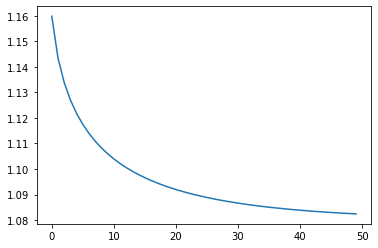

In [193]:
plt.plot(losses)

In [194]:
# Calculates accuracy of test data
def accuracy(y, y_pred):

    total_correct = 0
    confusion_matrix = np.zeros(shape=(CLASS_NUMBER, CLASS_NUMBER))

    numData = y.shape[1]
    
    # Iterating through all of data
    for data in range(numData):
        # Returns array for index of max probabilities for each data point 
        y_indexes = np.argmax(y, axis=0)
        y_pred_indexes = np.argmax(y_pred, axis=0)
        
        confusion_matrix[y_indexes[data]][y_pred_indexes[data]] += 1
        total_correct = np.sum(y_indexes == y_pred_indexes)
        
    total_accuracy = total_correct/numData
    return confusion_matrix, total_accuracy 


In [195]:
# Accuracy and confusion matrix check
z = class_corr(w, b, x_test)
y_pred = softmax(z)

confusion_matrix, model_acc = accuracy(y_test, y_pred)

print(confusion_matrix)
print(model_acc)


[[2. 2. 3.]
 [2. 4. 3.]
 [3. 6. 5.]]
0.36666666666666664
